In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [3]:
breast_cancer = pd.read_excel(r'C:\Users\Pajos\Desktop\django\dataR2.xlsx')
breast_cancer.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,0
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,0
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,0
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,0
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,0


In [4]:
print(" # of patients in the data: " + str(len(breast_cancer.index)))

 # of patients in the data: 115


## Analyzing Data

<AxesSubplot:xlabel='Classification', ylabel='count'>

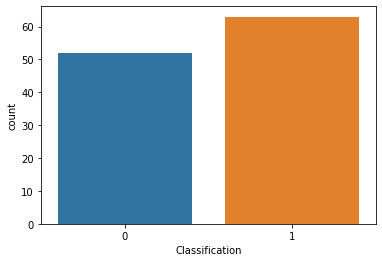

In [5]:
sns.countplot(x="Classification", data=breast_cancer)

<AxesSubplot:xlabel='Classification', ylabel='count'>

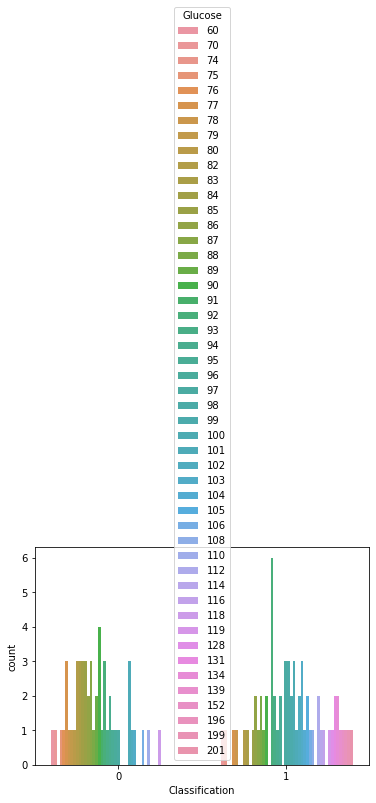

In [7]:
sns.countplot(x="Classification", hue="Glucose", data=breast_cancer)

<AxesSubplot:ylabel='Frequency'>

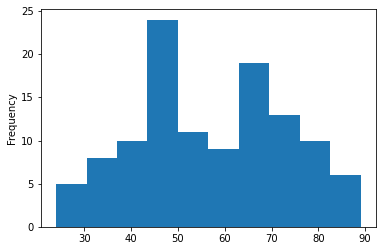

In [8]:
breast_cancer["Age"].plot.hist()

In [9]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             115 non-null    int64  
 1   BMI             115 non-null    float64
 2   Glucose         115 non-null    int64  
 3   Insulin         115 non-null    float64
 4   HOMA            115 non-null    float64
 5   Leptin          115 non-null    float64
 6   Adiponectin     115 non-null    float64
 7   Resistin        115 non-null    float64
 8   MCP.1           115 non-null    float64
 9   Classification  115 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.1 KB


## Data Wrangling 

In [13]:
breast_cancer.isnull()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
110,False,False,False,False,False,False,False,False,False,False
111,False,False,False,False,False,False,False,False,False,False
112,False,False,False,False,False,False,False,False,False,False
113,False,False,False,False,False,False,False,False,False,False


In [14]:
breast_cancer.isnull().sum()

Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64

<AxesSubplot:>

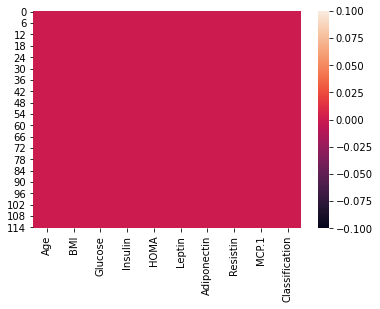

In [15]:
sns.heatmap(breast_cancer.isnull())

<AxesSubplot:>

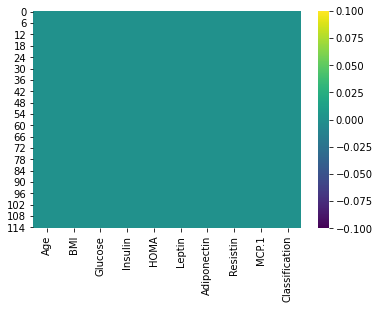

In [22]:
sns.heatmap(breast_cancer.isnull(), cmap= "viridis")

<AxesSubplot:xlabel='Age', ylabel='Glucose'>

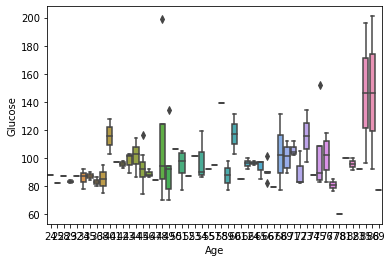

In [23]:
sns.boxplot(x="Age", y= "Glucose", data=breast_cancer)

<AxesSubplot:>

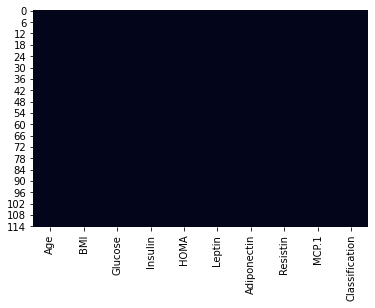

In [24]:
sns.heatmap(breast_cancer.isnull(), cbar =False)

In [25]:
breast_cancer.isnull().sum()

Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64

### TRAIN DATASET

In [27]:
X= breast_cancer.drop("Classification", axis=1)
Y= breast_cancer["Classification"]

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [37]:
logmodel= LogisticRegression()
logmodel.fit(X_train, Y_train)

C:\Users\Pajos\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [46]:
predictions =logmodel.predict(X_test)
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
predictions

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0], dtype=int64)

In [41]:
accuracy_score(Y_test, predictions)

0.8

In [43]:
classification_report(Y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.67      0.83      0.74        12\n           1       0.90      0.78      0.84        23\n\n    accuracy                           0.80        35\n   macro avg       0.78      0.81      0.79        35\nweighted avg       0.82      0.80      0.80        35\n'

In [47]:
confusion_matrix(Y_test, predictions)

array([[10,  2],
       [ 5, 18]], dtype=int64)